<div style="max-width:66ch;">

## 0. Find missing values (*)

&nbsp; a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame


In [71]:
import pandas as pd

file_path = '../Data/student-mat-missing-data.csv'
df = pd.read_csv(file_path)


df.head()


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10



&nbsp; b) Do some initial explorations with the methods to get an understanding of the dataset:
```py
head(), info(), describe(), value_counts(), unique, columns()


In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         381 non-null    float64
 4   address     390 non-null    object 
 5   famsize     395 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        395 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      395 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   395 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        395 non-null    object 
 19  activities  395 non-null    o

In [73]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,381.000000,395.000000,395.000000,395.000000,395.000000,395.000000,390.000000,379.000000,390.000000,395.000000,395.000000,390.000000,390.000000,395.000000,395.000000,395.000000
mean,197.000000,16.700787,2.749367,2.521519,1.448101,2.035443,0.334177,3.943590,3.237467,3.120513,1.481013,2.291139,3.548718,5.569231,10.908861,10.713924,10.415190
std,114.170924,1.275157,1.094735,1.088201,0.697505,0.839240,0.743651,0.896665,0.990201,1.112370,0.890741,1.287897,1.394604,7.232395,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,98.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,197.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,295.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


In [74]:
df.value_counts()

Unnamed: 0  school  sex  age   address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0           GP      F    18.0  U        GT3      A        4     4     at_home   teacher   course      mother    2           2          0         yes        no      no    no          yes      yes     no        no        4.0     3.0       4.0    1     1     3.0     6.0       5   6   6     1
258         GP      M    18.0  U        GT3      T        2     1     other     other     home        mother    1           2          0         no         no      no    yes         yes      yes     yes       no        5.0     2.0       4.0    1     2     4.0     8.0       15  14  14    1
267         GP      F    18.0  R        GT3      T        4     4     teacher   other     reputation  mother    2           2          

In [75]:
df.columns.unique()

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

```
c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py.
When you come across more useful functions, you can store them in your data_utils module. 


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ritar ett stapeldiagram för kolumner med saknade värden i en DataFrame.
def plot_missing_values(df):
    
    # Räkna saknade värden per kolumn
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    # Om det finns saknade värden, rita ett stapeldiagram
    if not missing_values.empty:
        sns.barplot(x=missing_values.index, y=missing_values.values)
        plt.ylabel('Antal saknade värden')
        plt.xticks(rotation=45, ha='right')
        plt.title('Saknade värden per kolumn')
        plt.show()
    else:
        print("Inga saknade värden hittades.")



&nbsp; d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.


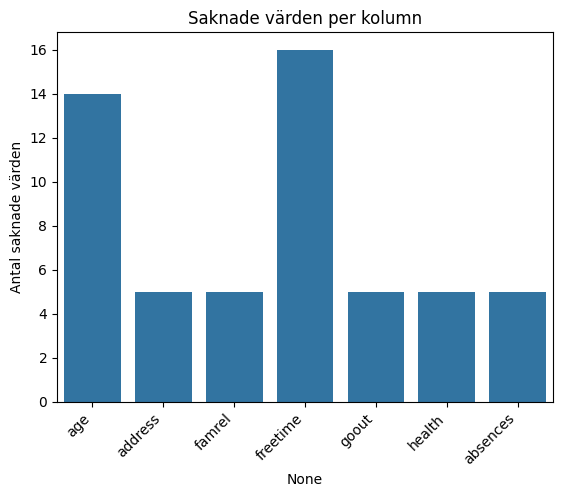

In [77]:
from data_utils import plot_missing_values

plot_missing_values(df)


&nbsp; e) Find all rows where the freetime is NaN.   


In [78]:
nan_freetime_rows = df[df['freetime'].isna()]

print(nan_freetime_rows)

     Unnamed: 0 school sex   age address famsize Pstatus  Medu  Fedu  \
87           87     GP   F  15.0       U     GT3       T     4     2   
99           99     GP   F  16.0       U     GT3       T     4     3   
130         130     GP   F  15.0       R     GT3       T     3     4   
149         149     GP   M  15.0       U     LE3       A     2     1   
151         151     GP   M  16.0       U     LE3       T     2     1   
160         160     GP   M   NaN     NaN     LE3       T     2     1   
191         191     GP   F   NaN     NaN     GT3       T     1     1   
257         257     GP   M  19.0       U     LE3       A     4     3   
276         276     GP   F   NaN     NaN     GT3       A     3     2   
293         293     GP   F   NaN     NaN     LE3       T     3     1   
308         308     GP   M  19.0       R     GT3       T     3     3   
330         330     GP   M  18.0       U     LE3       T     2     2   
343         343     GP   F  17.0       U     GT3       A     2  


&nbsp; f) Find all rows where the freetime **or** the age is NaN.  


In [79]:

rows_with_nan_in_freetime_or_age = df[pd.isna(df['freetime']) | pd.isna(df['age'])]

print(rows_with_nan_in_freetime_or_age)


     Unnamed: 0 school sex   age address famsize Pstatus  Medu  Fedu  \
20           20     GP   M   NaN       U     GT3       T     4     3   
71           71     GP   M   NaN       U     GT3       T     4     2   
87           87     GP   F  15.0       U     GT3       T     4     2   
99           99     GP   F  16.0       U     GT3       T     4     3   
102         102     GP   M   NaN       U     GT3       T     4     4   
106         106     GP   F   NaN       U     GT3       T     2     2   
121         121     GP   M   NaN       U     GT3       T     2     2   
130         130     GP   F  15.0       R     GT3       T     3     4   
149         149     GP   M  15.0       U     LE3       A     2     1   
151         151     GP   M  16.0       U     LE3       T     2     1   
160         160     GP   M   NaN     NaN     LE3       T     2     1   
188         188     GP   F   NaN       U     GT3       A     3     3   
191         191     GP   F   NaN     NaN     GT3       T     1  


&nbsp; g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

</div>




In [80]:
# Räkna antalet rader med mer än ett NaN-värde
rows_with_multiple_nans = df[df.isnull().sum(axis=1) > 1].shape[0]

# Totalt antal rader i DataFrame
total_rows = df.shape[0]

# Beräkna proportionen av rader med flera NaN-värden
proportion_of_multiple_nans = rows_with_multiple_nans / total_rows

print("Proportion of rows with multiple NaNs:", proportion_of_multiple_nans)


Proportion of rows with multiple NaNs: 0.012658227848101266


<div style="max-width:66ch;">

---
## 2. Clean the data (*)

&nbsp; a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.  
Now remove these rows and use your missing-value utility function visualize the remaining NaNs.


In [81]:
df.dropna(subset=['freetime', 'age'], how='any', inplace=True)

# Visualiserar kvarvarande NaN-värden
plot_missing_values(df)

Inga saknade värden hittades.



&nbsp; b) The domain expert has told you that you have to fill in the missing age values.
Start with visualising the age distribution in the dataset using a histogram. 


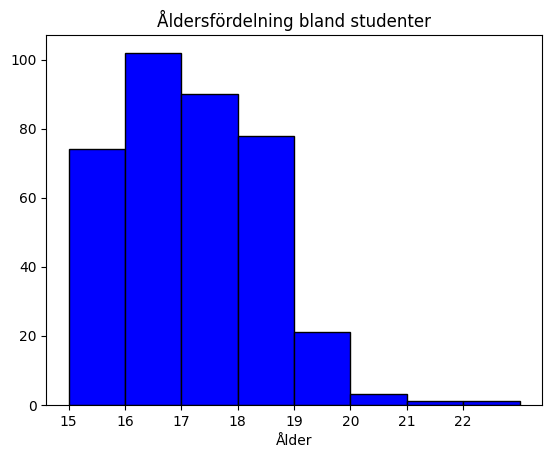

In [82]:
# Skapar ett histogram för 'age' kolumnen direkt
plt.hist(df['age'].dropna(), bins=range(int(df['age'].min()), int(df['age'].max()) + 2), color='blue', edgecolor='black')
plt.title('Åldersfördelning bland studenter')
plt.xlabel('Ålder')
plt.xticks(range(int(df['age'].min()), int(df['age'].max()) + 1))
plt.show()




&nbsp; c) Check which columns there are in the dataset to see what can be utilised in determining the age.


In [83]:
df.columns.tolist()

['Unnamed: 0',
 'school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']


&nbsp; d) The column higher seems interesting. Let's see which unique values it can have. 


In [84]:
unique_values_in_higher = df['higher'].unique()

print(unique_values_in_higher)


['yes' 'no']



&nbsp; e) Let's see if we can see some connection between age distribution and higher.
Make 3 subplots of age histograms:
- Plot 1: same as b)
- Plot 2: age distribution when higher is yes 
- Plot 3: age distribution when higher is no  


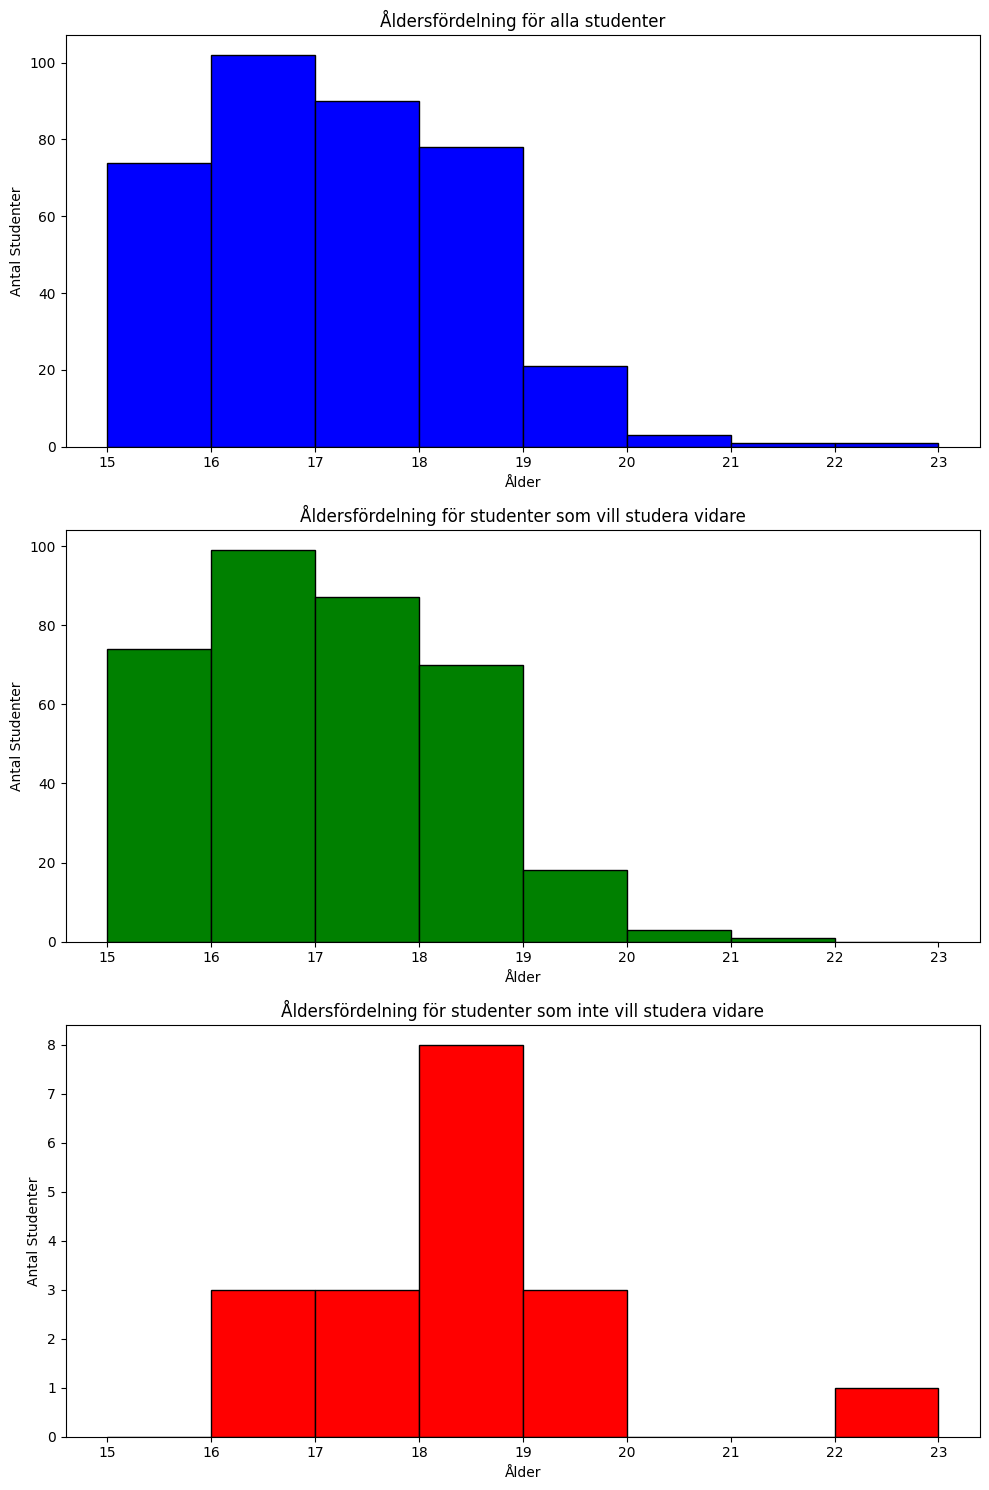

In [85]:
# Skapar tre subplottar för att visa åldersfördelning för olika grupper
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plottar åldersfördelningen för alla studenter
ax[0].hist(df['age'].dropna(), bins=range(int(df['age'].min()), int(df['age'].max()) + 2), color='blue', edgecolor='black')
ax[0].set_title('Åldersfördelning för alla studenter')
ax[0].set_xlabel('Ålder')
ax[0].set_ylabel('Antal Studenter')

# Plottar åldersfördelningen för studenter som vill fortsätta studera högre utbildning
ax[1].hist(df[df['higher'] == 'yes']['age'].dropna(), bins=range(int(df['age'].min()), int(df['age'].max()) + 2), color='green', edgecolor='black')
ax[1].set_title('Åldersfördelning för studenter som vill studera vidare')
ax[1].set_xlabel('Ålder')
ax[1].set_ylabel('Antal Studenter')

# Plottar åldersfördelningen för studenter som inte vill fortsätta studera högre utbildning
ax[2].hist(df[df['higher'] == 'no']['age'].dropna(), bins=range(int(df['age'].min()), int(df['age'].max()) + 2), color='red', edgecolor='black')
ax[2].set_title('Åldersfördelning för studenter som inte vill studera vidare')
ax[2].set_xlabel('Ålder')
ax[2].set_ylabel('Antal Studenter')

plt.tight_layout()
plt.show()



&nbsp; f) That was hard to find a connection. When reading [dataset source](https://www.kaggle.com/uciml/student-alcohol-consumption) we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

&nbsp; Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns


In [86]:
df['Alcohol'] = df['Dalc'] + df['Walc']
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,3.0,4.0,1,1,3.0,6.0,5,6,6,2
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,3.0,3.0,1,1,3.0,4.0,5,5,6,2
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,3.0,2.0,2,3,3.0,10.0,7,8,10,5
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,2.0,2.0,1,1,5.0,2.0,15,14,15,2
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,3.0,2.0,1,2,5.0,4.0,6,10,10,3



&nbsp; g) Make a barchart for alcohol consumption vs age.


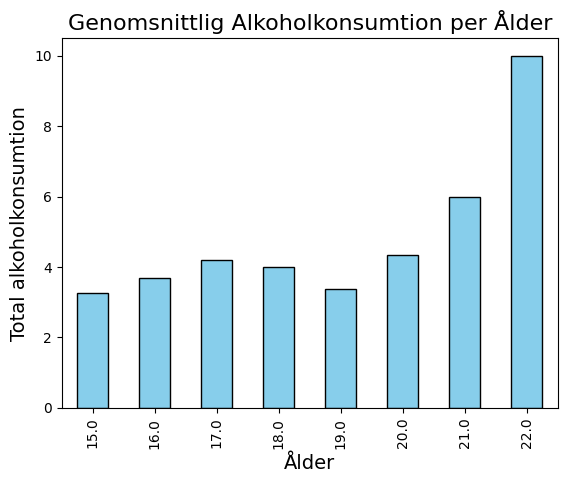

In [87]:
df.groupby('age')['Alcohol'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Genomsnittlig Alkoholkonsumtion per Ålder', fontsize=16)
plt.xlabel('Ålder', fontsize=14)
plt.ylabel('Total alkoholkonsumtion', fontsize=14)
plt.show()


&nbsp; h) We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves: 
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify 
- alcohol level < 4 -> 15 years old

Fill these in and visualize missing values. 

&nbsp; Note: could make more stringent by computing percentages based on the distribution

</div>


